Implementing **SVM** on Position Salaries dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
data = pd.read_csv(r'E:\Jupyterfiles\ML_practice\Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
data.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = data.iloc[:, 1: 2].values
Y = data.iloc[:, 2:].values

# Feature scaling

In [5]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
Y = sc_y.fit_transform(Y)

# SVM with RBF kernel

In [6]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X, Y)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

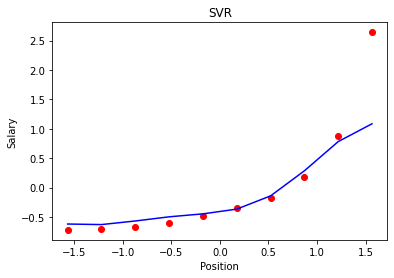

In [7]:
plt.scatter(X, Y , color="red")
plt.plot(X, regressor.predict(X), color="blue")
plt.title("SVR")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

# Making prediction

In [8]:
# First transform 6.5 to feature scaling
sc_X_val = sc_x.transform(np.array([[6.5]]))

# Second predict the value
scaled_y_pred = regressor.predict(sc_X_val)

# Third - since this is scaled - we have to inverse transform
y_pred = sc_y.inverse_transform(scaled_y_pred)

print('The predicted salary of a person at 6.5 Level is ', y_pred)

The predicted salary of a person at 6.5 Level is  [170370.0204065]
